# KPI Propuesto
Debes graficar y medir el KPI propuesto a continuación, representándolo adecuadamente en el dashboard. A su vez, tambíen tienes que proponer, medir y graficar un segundo KPI que consideres relevante para la temática.
El KPI propuesto es:

Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia.
La fórmula es la siguiente:

$KPI = ((Nuevo acceso - Acceso actual) / Acceso actual) * 100$

Donde:

"Nuevo acceso" se refiere al número de hogares con acceso a Internet después del próximo trimestre.
"Acceso actual" se refiere al número de hogares con acceso a Internet en el trimestre actual.
Esta fórmula te ayudará a calcular el KPI para medir el aumento en el acceso a Internet por cada 100 hogares en cada provincia.

Ejemplo de uso:

KPI = ((510 - 500) / 500) * 100 = 2%

In [58]:
import pandas as pd 

fileName = "dataClean//01-Internet_Penetracion.csv"
df = pd.read_csv(fileName)
# 01Internet_Penetracion.csv

# Crear la columna 'Periodo' concatenando Año y Trimestre
df['Periodo'] = df['Año'].astype(str) + ' Q' + df['Trimestre'].astype(str)
df = df[['Periodo','Provincia','Accesos por cada 100 hogares']]

# Convierte la columna a cadena
df['Accesos por cada 100 hogares'] = df['Accesos por cada 100 hogares'].astype(str)
# Reemplaza las comas por puntos
df['Accesos por cada 100 hogares'] = df['Accesos por cada 100 hogares'].str.replace(',', '.')
# Convierte la columna a números
df['Accesos por cada 100 hogares'] = pd.to_numeric(df['Accesos por cada 100 hogares'], errors='coerce')

# Agrega una columna vacía llamada 'Nueva_Columna'
df['Crecimiento 2%'] = ''

df.head(3)

,Periodo,Provincia,Accesos por cada 100 hogares,Crecimiento 2%
0,2022 Q4,Buenos Aires,78.94,
1,2022 Q4,Capital Federal,122.73,
2,2022 Q4,Catamarca,65.77,


In [76]:
# Ordena el DataFrame por provincia y periodo
df.sort_values(by=['Provincia', 'Periodo'], inplace=True)
# Resetear el índice
df.reset_index(drop=True, inplace=True)
# Agrega una columna vacía llamada 'Crecimiento 2%'
df['Crecimiento 2%'] = ''
incremento = 0
provincia_actual = ""

# Recorre el DataFrame por filas
for index, row in df.iterrows():
    if row['Provincia'] != provincia_actual:
        incremento = row['Accesos por cada 100 hogares']
        df.loc[index, 'Crecimiento 2%'] = incremento
        provincia_actual = row['Provincia']
    else:
        incremento = round(incremento * 1.02, 2)
        df.loc[index, 'Crecimiento 2%'] = incremento

    #print(f"indice:{index}  Periodo: {row['Periodo']}, Crecimiento : Real: {row['Accesos por cada 100 hogares']} Sostenido : {row['Crecimiento 2%']}")

df.head()


,Periodo,Provincia,Accesos por cada 100 hogares,Crecimiento 2%
0,2014 Q1,Buenos Aires,54.57,54.57
1,2014 Q2,Buenos Aires,55.06,55.66
2,2014 Q3,Buenos Aires,56.75,56.77
3,2014 Q4,Buenos Aires,56.09,57.91
4,2015 Q1,Buenos Aires,56.37,59.07


In [78]:
# Crea la nueva columna 'kpi 2%'
df['kpi 2%'] = round(df['Accesos por cada 100 hogares'] + df['Accesos por cada 100 hogares'] * 0.02,2)
df.head(3)

,Periodo,Provincia,Accesos por cada 100 hogares,Crecimiento 2%,kpi 2%
0,2014 Q1,Buenos Aires,54.57,54.57,55.66
1,2014 Q2,Buenos Aires,55.06,55.66,56.16
2,2014 Q3,Buenos Aires,56.75,56.77,57.88


In [80]:
df['nuevo kpi'] = round(((df['kpi 2%'] - df['Accesos por cada 100 hogares'])/df['Accesos por cada 100 hogares'])*100,2)
df.head()

,Periodo,Provincia,Accesos por cada 100 hogares,Crecimiento 2%,kpi 2%,nuevo kpi
0,2014 Q1,Buenos Aires,54.57,54.57,55.66,2.00
1,2014 Q2,Buenos Aires,55.06,55.66,56.16,2.00
2,2014 Q3,Buenos Aires,56.75,56.77,57.88,1.99
3,2014 Q4,Buenos Aires,56.09,57.91,57.21,2.00
4,2015 Q1,Buenos Aires,56.37,59.07,57.50,2.00


In [81]:
# Crea una nueva columna llamada 'Prox Trim' que contiene el valor de la fila siguiente
df['Prox Trim'] = df['Accesos por cada 100 hogares'].shift(-1)

df.head()

,Periodo,Provincia,Accesos por cada 100 hogares,Crecimiento 2%,kpi 2%,nuevo kpi,Prox Trim
0,2014 Q1,Buenos Aires,54.57,54.57,55.66,2.00,55.06
1,2014 Q2,Buenos Aires,55.06,55.66,56.16,2.00,56.75
2,2014 Q3,Buenos Aires,56.75,56.77,57.88,1.99,56.09
3,2014 Q4,Buenos Aires,56.09,57.91,57.21,2.00,56.37
4,2015 Q1,Buenos Aires,56.37,59.07,57.50,2.00,56.80


In [83]:
# Guardar el DataFrame en un archivo CSV
nombre_archivo = './/Data(ST)//kpi_propuesto.csv'
df.to_csv(nombre_archivo, index=False)

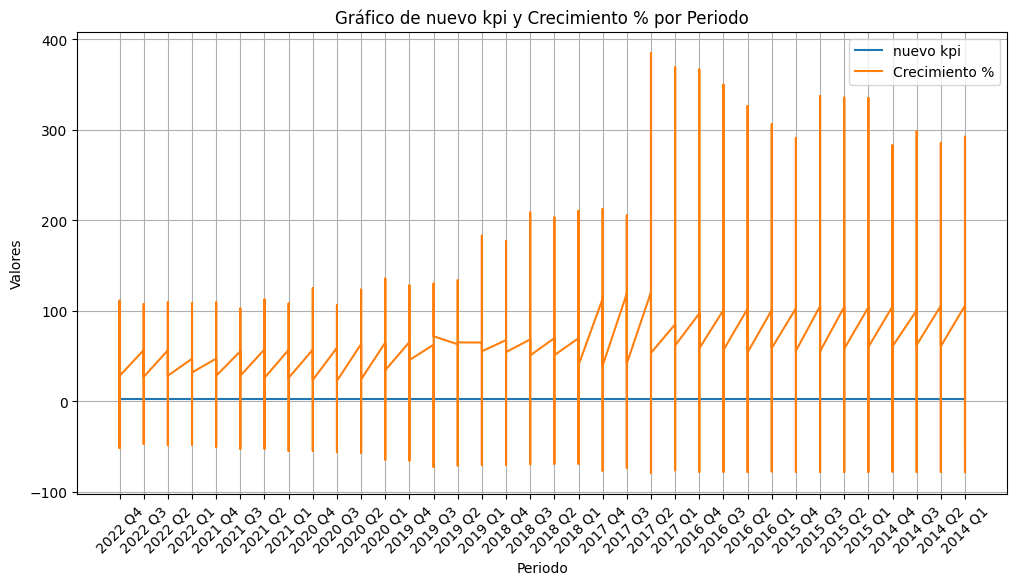

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df['nuevo kpi'] = pd.to_numeric(df['nuevo kpi'], errors='coerce')
df['Crecimiento %'] = pd.to_numeric(df['Crecimiento %'], errors='coerce')

# Crear la columna 'Periodo'
df['Periodo'] = df['Año'].astype(str) + ' Q' + df['Trimestre'].astype(str)

# Graficar las columnas 'nuevo kpi' y 'Crecimiento %' en función del periodo
plt.figure(figsize=(12, 6))
plt.plot(df['Periodo'], df['nuevo kpi'], label='nuevo kpi')
plt.plot(df['Periodo'], df['Crecimiento %'], label='Crecimiento %')

# Configurar el gráfico
plt.title('Gráfico de nuevo kpi y Crecimiento % por Periodo')
plt.xlabel('Periodo')
plt.ylabel('Valores')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()



In [21]:
import pandas as pd
import plotly.express as px

# Crear la columna 'Periodo' concatenando Año y Trimestre
df['Periodo'] = df['Año'].astype(str) + ' Q' + df['Trimestre'].astype(str)

# Crear la figura interactiva con Plotly Express
fig = px.line(df, x='Periodo', y=['nuevo kpi', 'Crecimiento %', 'Accesos por cada 100 hogares'],
              color='Provincia', labels={'value': 'Valor', 'variable': 'Indicador'},
              title='Gráfica Interactiva por Provincia')

# Configurar la leyenda para que inicialmente estén ocultas
fig.for_each_trace(lambda t: t.update(visible='legendonly'))

# Actualizar el diseño para incluir un botón de leyenda
fig.update_layout(updatemenus=[dict(type='buttons', showactive=False, buttons=[
    dict(label='nuevo kpi',
         method='update',
         args=[{'visible': ['nuevo kpi', False, False]},
               {'title': 'Gráfica Interactiva por Provincia'}]),
    dict(label='Crecimiento %',
         method='update',
         args=[{'visible': [False, 'Crecimiento %', False]},
               {'title': 'Gráfica Interactiva por Provincia'}]),
    dict(label='Accesos por cada 100 hogares',
         method='update',
         args=[{'visible': [False, False, 'Accesos por cada 100 hogares']},
               {'title': 'Gráfica Interactiva por Provincia'}])
])])

# Guardar la figura como un archivo HTML
fig.write_html(file='grafica_interactiva.html', auto_open=True)

